In [11]:
from cdlib.algorithms import louvain, surprise_communities, leiden, walktrap
from matplotlib.colors import ListedColormap
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
import numpy as np

RANDOM_SEED = 671

In [12]:
all_data = pd.read_csv("movies.csv")
all_data.head()

,rank,movie_id,title,year,link,imbd_votes,imbd_rating,certificate,duration,genre,...,director_id,director_name,writer_id,writer_name,storyline,user_id,user_name,review_id,review_title,review_content
0,1,tt0111161,The Shawshank Redemption,1994,https://www.imdb.com/title/tt0111161,"2,711,075",9.3,R,2h 22m,Drama,...,nm0001104,Frank Darabont,"nm0000175,nm0001104","Stephen King,Frank Darabont","Over the course of several years, two convicts...","ur16161013,ur15311310,ur0265899,ur16117882,ur1...","hitchcockthelegend,Sleepin_Dragon,EyeDunno,ale...","rw2284594,rw6606154,rw1221355,rw1822343,rw1288...","Some birds aren't meant to be caged.,An incred...",The Shawshank Redemption is written and direct...
1,2,tt0068646,The Godfather,1972,https://www.imdb.com/title/tt0068646,"1,882,829",9.2,R,2h 55m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0701374,nm0000338","Mario Puzo,Francis Ford Coppola",The aging patriarch of an organized crime dyna...,"ur24740649,ur86182727,ur15794099,ur15311310,ur...","CalRhys,andrewburgereviews,gogoschka-1,Sleepin...","rw3038370,rw4756923,rw4059579,rw6568526,rw1897...","The Pinnacle Of Flawless Films!,An offer so go...",'The Godfather' is the pinnacle of flawless fi...
2,3,tt0468569,The Dark Knight,2008,https://www.imdb.com/title/tt0468569,"2,684,051",9.0,PG-13,2h 32m,"Action,Crime,Drama",...,nm0634240,Christopher Nolan,"tt0468569,nm0634300,nm0634240,nm0275286,tt0468569","Writers,Jonathan Nolan,Christopher Nolan,David...",When the menace known as the Joker wreaks havo...,"ur87850731,ur1293485,ur129557514,ur12449122,ur...","MrHeraclius,Smells_Like_Cheese,dseferaj,little...","rw5478826,rw1914442,rw6606026,rw1917099,rw5170...","The Dark Knight,The Batman of our dreams! So m...","Confidently directed, dark, brooding, and pack..."
3,4,tt0071562,The Godfather Part II,1974,https://www.imdb.com/title/tt0071562,"1,285,350",9.0,R,3h 22m,"Crime,Drama",...,nm0000338,Francis Ford Coppola,"nm0000338,nm0701374","Francis Ford Coppola,Mario Puzo",The early life and career of Vito Corleone in ...,"ur0176092,ur0688559,ur92260614,ur0200644,ur117...","Nazi_Fighter_David,tfrizzell,umunir-36959,DanB...","rw0135607,rw0135487,rw5049900,rw0135526,rw0135...",Breathtaking in its scope and tragic grandeur....,"Coppola's masterpiece is rivaled only by ""The ..."
4,5,tt0050083,12 Angry Men,1957,https://www.imdb.com/title/tt0050083,"800,954",9.0,Approved,1h 36m,"Crime,Drama",...,nm0001486,Sidney Lumet,nm0741627,Reginald Rose,The jury in a New York City murder trial is fr...,"ur1318549,ur0643062,ur0688559,ur20552756,ur945...","uds3,tedg,tfrizzell,TheLittleSongbird,henrique...","rw0060044,rw0060025,rw0060034,rw2262425,rw5448...","The over-used term ""classic movie"" really come...",This once-in-a-generation masterpiece simply h...


In [13]:
all_data.columns

Index(['rank', 'movie_id', 'title', 'year', 'link', 'imbd_votes',
       'imbd_rating', 'certificate', 'duration', 'genre', 'cast_id',
       'cast_name', 'director_id', 'director_name', 'writer_id', 'writer_name',
       'storyline', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content'],
      dtype='object')

In [14]:
people = all_data[["director_name", "writer_name", "cast_name"]]
people.head()

,director_name,writer_name,cast_name
0,Frank Darabont,"Stephen King,Frank Darabont","Tim Robbins,Morgan Freeman,Bob Gunton,William ..."
1,Francis Ford Coppola,"Mario Puzo,Francis Ford Coppola","Marlon Brando,Al Pacino,James Caan,Richard S. ..."
2,Christopher Nolan,"Writers,Jonathan Nolan,Christopher Nolan,David...","Christian Bale,Heath Ledger,Aaron Eckhart,Mich..."
3,Francis Ford Coppola,"Francis Ford Coppola,Mario Puzo","Al Pacino,Robert Duvall,Diane Keaton,Robert De..."
4,Sidney Lumet,Reginald Rose,"Martin Balsam,John Fiedler,Lee J. Cobb,E.G. Ma..."


In [15]:
movie_casts = people["cast_name"]
cast_graph = nx.Graph()
i = 0
for movie in movie_casts:
    i += 1
    if i <= 1000:
        casts = movie.split(",")
        casts = casts[:16]
        casts = combinations(casts, 2)
        for cast_pair in casts:
            cast_graph.add_edge(*cast_pair)
            # if cast_graph.has_edge(*cast_pair):
            #     cast_graph[cast_pair[0]][cast_pair[1]]["weight"] += 1
            # else:
            #     cast_graph.add_edge(*cast_pair, weight=1)

In [16]:
connected_components = list(nx.connected_components(cast_graph))
largest_component = max(connected_components, key=len)
cast_graph = cast_graph.subgraph(largest_component)

In [17]:
print(cast_graph.number_of_nodes())
print(cast_graph.number_of_edges())
print(len(list(nx.connected_components(cast_graph))))

2684
23301
1


In [18]:
def create_color_list(k):
    cmap = plt.get_cmap('tab20', k)
    colors = [cmap(i) for i in range(k)]
    return colors

def community_detection(coms, name=""):
    num_communities = len(coms.communities)
    print(num_communities)
    colors = create_color_list(num_communities)
    community_cmap = ListedColormap(colors)
    pos = nx.spring_layout(cast_graph, seed=RANDOM_SEED)
    node_colors = [com_idx for com_idx, nodes in enumerate(coms.communities) for _ in nodes]
    nx.draw(cast_graph, pos, node_color=node_colors, with_labels=False, font_weight='bold', cmap=community_cmap, node_size=30, width=0.3)
    plt.title(f'{name} Communities Detection')
    plt.show()


35


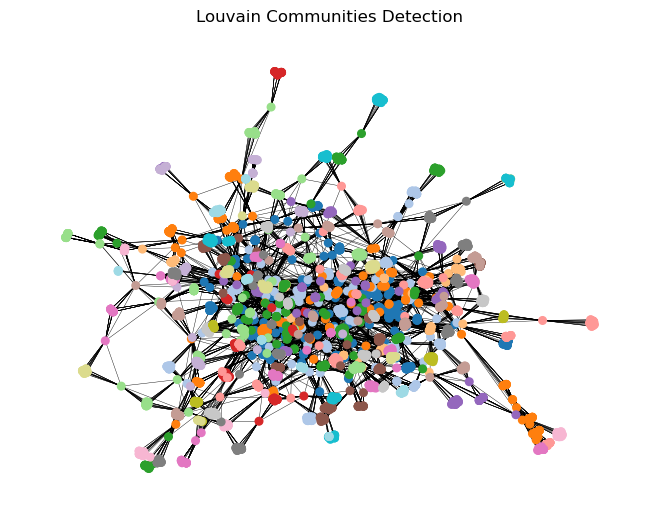

35


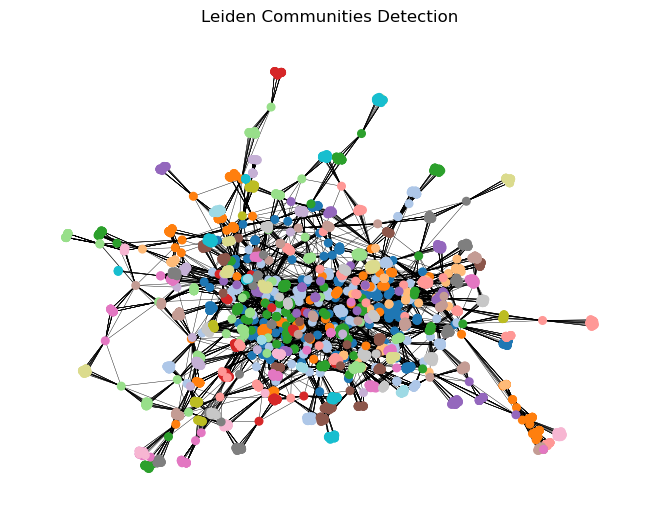

In [19]:
coms = louvain(cast_graph, resolution=1, randomize=False)
community_detection(coms, "Louvain")
# coms = surprise_communities(cast_graph)
# community_detection(coms, "Surprise")
coms = leiden(cast_graph)
community_detection(coms, "Leiden")
# coms = walktrap(cast_graph)
# community_detection(coms, "Walktrap")
# from cdlib.algorithms import kclique
# coms = kclique(cast_graph, k=10)
# community_detection(coms, "Walktrap")

In [20]:
# print(nx.adamic_adar_index(cast_graph))
# print(nx.average_neighbor_degree(cast_graph))
# # print(nx.average_shortest_path_length(cast_graph))
# print(nx.betweenness_centrality(cast_graph))
# print(nx.closeness_centrality(cast_graph))
# print(nx.degree_centrality(cast_graph))
# print(nx.strongly_connected_components(cast_graph))
# print(nx.transitivity(cast_graph))